### **Bike Sharing Prediction Project**

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

### **Business Problem Understanding**

**Context**

Bike Sharing merupakan evolusi modern dari system penyewaan sepeda tradisional, di mana seluruh proses—mulai dari keanggotaan, penyewaan, hingga pengembalian—telah sepenuhnya otomatis. Sistem ini memungkinkan pengguna untuk menyewa sepeda dari satu lokasi dan mengembalikannya di lokasi lain dengan mudah. Saat ini, terdapat lebih dari 500 program bike-sharing yang beroperasi di seluruh dunia, dengan jumlah sepeda melebihi 500.000 unit. Sistem ini semakin menarik perhatian karena peran pentingnya dalam mengatasi kemacetan lalu lintas, menjaga kelestarian lingkungan, dan meningkatkan kesehatan masyarakat.

**Problem Statement**

Dengan kemudahan pilihan transportasi yang diberikan, Bike Sharing memiliki keterbatasan dalam penggunaan oleh customer karena penggunaan sepeda ditentukan oleh :
Cuaca
Musim
Suhu
Kelembaban
Jumlah unit Ketika peak season

**Goals**

Prediksi total penggunaan Bike Sharing menjadi suatu hal yang perlu dilakukan

**Analytic Approach**

Menggunakan model regresi untuk memprediksi nilai numerik `cnt`. Beberapa fitur akan diolah secara kategorikal dan numerik untuk menangkap pola temporal dan musiman.

**Metric Evaluation**

- MAPE, MSE, RMSE: untuk mengukur seberapa besar kesalahan rata-rata dari prediksi


### **Data Understanding**

In [1]:
# Load dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('data_bike_sharing.csv')
df.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


In [2]:
# Info data
df.info()

# Statistik deskriptif
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,0.625451,1.416934,0.029758,2.488615,0.476996,0.498185,11.519770,35.834443,153.436580,189.271023
std,0.192102,0.635937,0.169925,1.106157,0.171857,0.192492,6.931872,49.489286,151.046123,181.223903
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,0.470000,1.000000,0.000000,2.000000,0.333300,0.340000,6.000000,4.000000,34.000000,40.000000
50%,0.620000,1.000000,0.000000,2.000000,0.484800,0.500000,12.000000,17.000000,115.000000,142.000000
75%,0.780000,2.000000,0.000000,3.000000,0.621200,0.660000,18.000000,49.000000,220.000000,282.000000
max,1.000000,4.000000,1.000000,4.000000,1.000000,1.000000,23.000000,362.000000,876.000000,970.000000


### **Data Preprocessing**

**Langkah-langkah pembersihan dan transformasi data:**
- Periksa missing values dan duplikat
- Validasi `cnt = casual + registered`
- Mapping kolom kategorikal menjadi lebih bermakna
- Menambahkan fitur waktu seperti `is_weekend`, `time_of_day`, `month`, dll.
- Denormalisasi suhu ke bentuk Celcius

In [3]:
# Preprocessing
df2 = df.copy()
# Cek null dan duplikat
print(df2.isnull().sum())
print("Duplikasi:", df2.duplicated().sum())
print("Validasi cnt:", (df2['casual'] + df2['registered'] == df2['cnt']).all())

dteday        0
hum           0
weathersit    0
holiday       0
season        0
atemp         0
temp          0
hr            0
casual        0
registered    0
cnt           0
dtype: int64
Duplikasi: 0
Validasi cnt: True


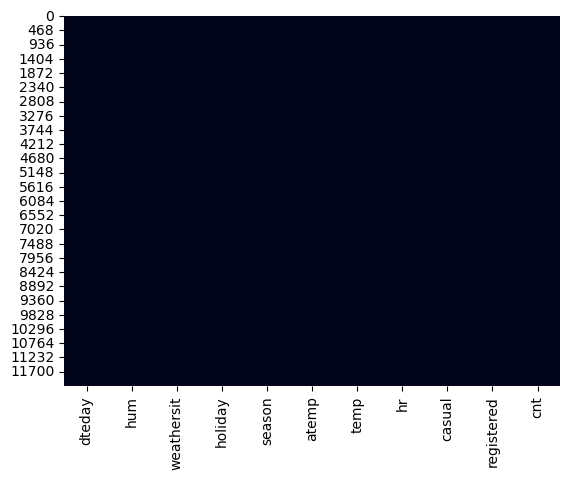

In [4]:
# Missing value heatmap
sns.heatmap(df2.isnull(), cbar=False);

In [5]:
# Mapping dan fitur waktu
df2['season'] = df2['season'].map({1:'winter', 2:'spring', 3:'summer', 4:'fall'})
df2['weathersit'] = df2['weathersit'].map({1:'Clear', 2:'Mist', 3:'Light Snow/Rain', 4:'Heavy Rain/Snow'})
df2['dteday'] = pd.to_datetime(df2['dteday'])
df2['month'] = df2['dteday'].dt.month
df2['weekday'] = df2['dteday'].dt.dayofweek
df2['is_weekend'] = df2['weekday'].apply(lambda x: 1 if x >= 5 else 0)
bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
df2['time_of_day'] = pd.cut(df2['hr'], bins=bins, labels=labels, right=False)
df2['temp_celsius'] = df2['temp'] * 47 - 8
df2['atemp_celsius'] = df2['atemp'] * 66 - 16

In [6]:
df2.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt,month,weekday,is_weekend,time_of_day,temp_celsius,atemp_celsius
0,2011-12-09,0.62,Clear,0,fall,0.3485,0.36,16,24,226,250,12,4,0,Afternoon,8.92,7.0010
1,2012-06-17,0.64,Clear,0,spring,0.5152,0.54,4,2,16,18,6,6,1,Night,17.38,18.0032
2,2011-06-15,0.53,Clear,0,spring,0.6212,0.62,23,17,90,107,6,2,0,Evening,21.14,24.9992
3,2012-03-31,0.87,Mist,0,spring,0.3485,0.36,8,19,126,145,3,5,1,Morning,8.92,7.0010
4,2012-07-31,0.55,Clear,0,summer,0.6970,0.76,18,99,758,857,7,1,0,Evening,27.72,30.0020


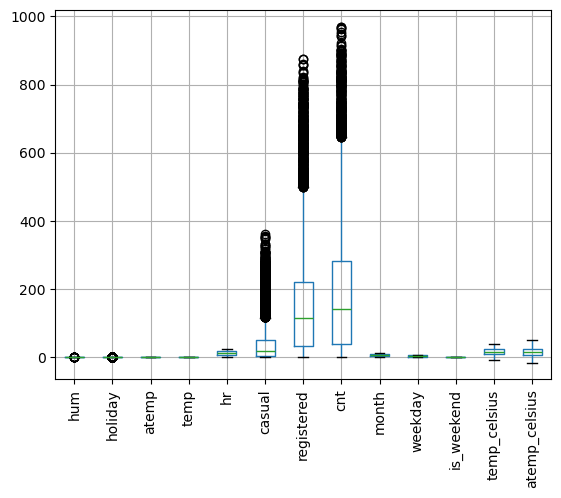

In [7]:
# Plot boxplot untuk mengecek outliers
df2.boxplot(rot=90);

Terlihat bahwa header casual, registered, dan count memiliki outliers yang cukup banyak, maka perlu dilakukan filtering data di dalamnya.

In [8]:
outliers_col = ['casual', 'registered', 'cnt']

def remove_outliers_iqr(df, column):
    Q1 = df2[column].quantile(0.25)
    Q3 = df2[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df2[(df2[column] >= lower_bound) & (df2[column] <= upper_bound)]

# Terapkan ke semua kolom yang mengandung outlier
for col in outliers_col:
    df2 = remove_outliers_iqr(df2, col)

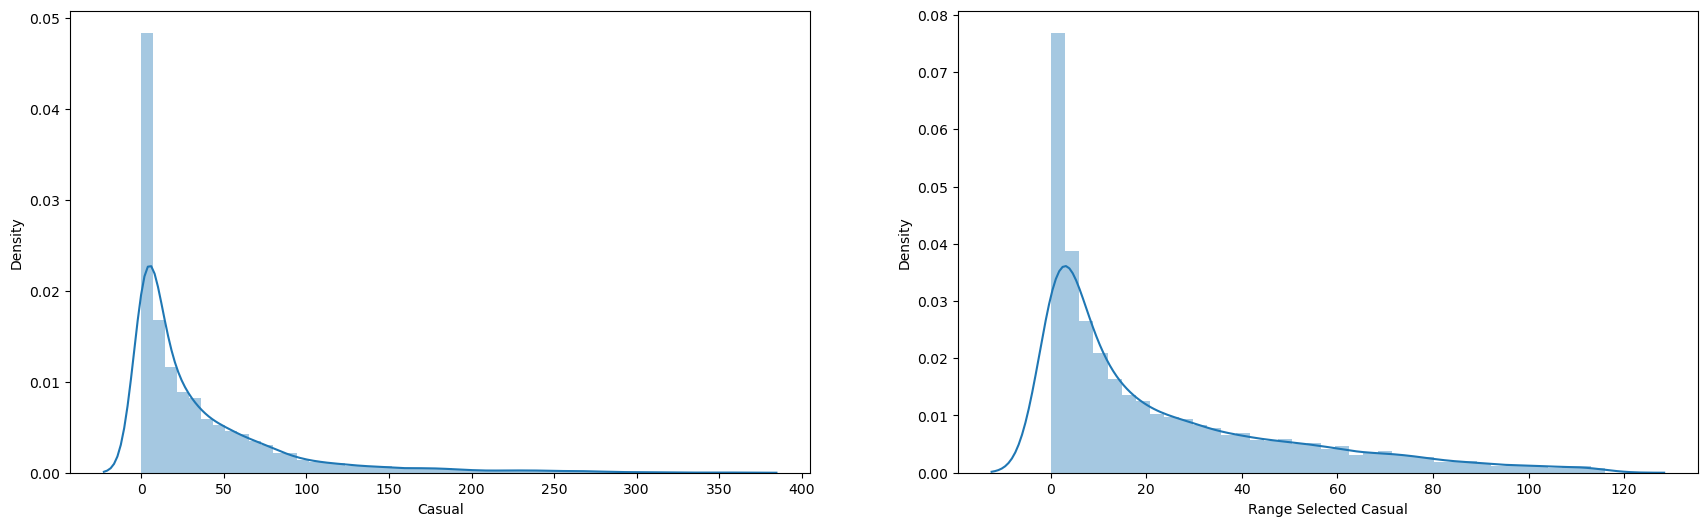

In [9]:
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['casual'], ax=axes[0])
sns.distplot(df2['casual'], ax=axes[1])
axes[0].set_xlabel('Casual')
axes[1].set_xlabel('Range Selected Casual');

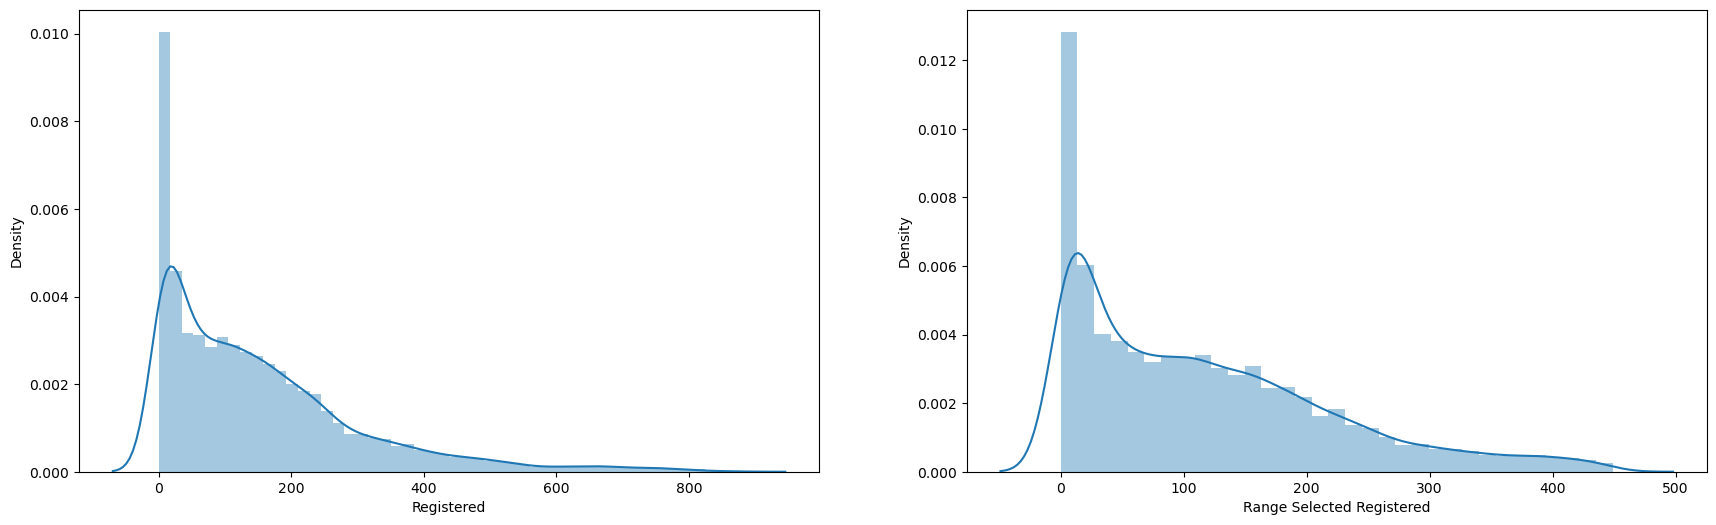

In [10]:
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['registered'], ax=axes[0])
sns.distplot(df2['registered'], ax=axes[1])
axes[0].set_xlabel('Registered')
axes[1].set_xlabel('Range Selected Registered');

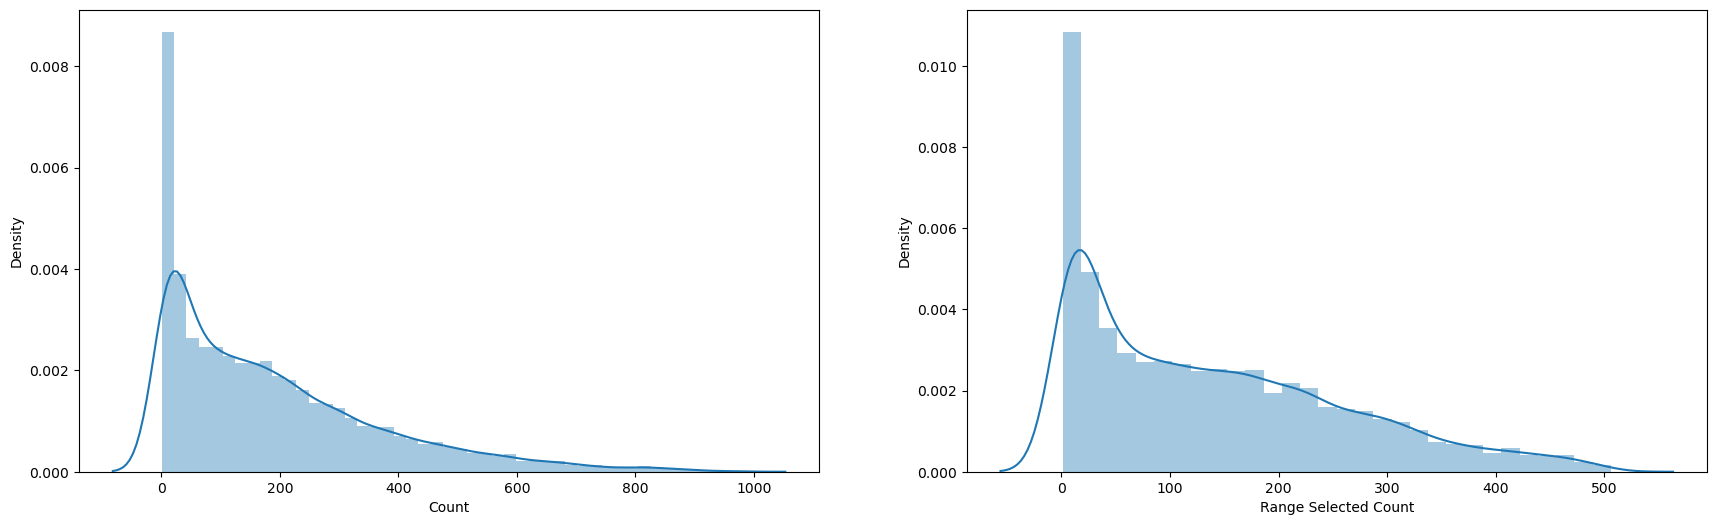

In [11]:
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['cnt'], ax=axes[0])
sns.distplot(df2['cnt'], ax=axes[1])
axes[0].set_xlabel('Count')
axes[1].set_xlabel('Range Selected Count');

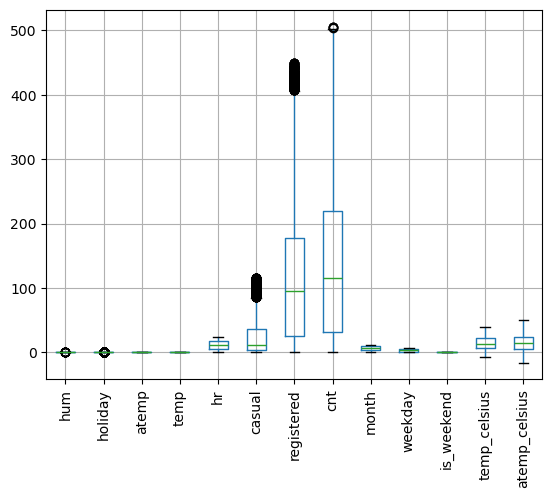

In [12]:
df2.boxplot(rot=90);

Data casuall, registered dan count yang sudah difilter untuk mengurangi outlier

### **Modeling**

Benchmark menggunakan model Linear Regression, K-Neighbors Regressor, Decision Tree, Random Forest, XGBoost


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Hapus kolom yang tidak digunakan
df_model = df2.drop(columns=['dteday', 'casual', 'registered'])
X = df_model.drop(columns='cnt')
y = df_model['cnt']
# One-hot encode kolom kategorikal (otomatis untuk tipe object/string)
X_encoded = pd.get_dummies(X)

# Lanjutkan dengan train-test split dan standardisasi
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Model
models = {
    'Linear Regression': LinearRegression(),
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42, verbosity=0)
}

# Fungsi MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    nonzero = y_true != 0
    return np.mean(np.abs((y_true[nonzero] - y_pred[nonzero]) / y_true[nonzero])) * 100

# Evaluasi
results = []
for name, model in models.items():
    if name in ['Linear Regression', 'KNN']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = mean_absolute_percentage_error(y_test, y_pred)
    results.append([name, mae, rmse, mape])

results_df = pd.DataFrame(results, columns=['Model', 'MAE', 'RMSE', 'MAPE'])
results_df

,Model,MAE,RMSE,MAPE
0,Linear Regression,62.986998,81.866333,214.998250
1,KNN,52.065482,74.065995,85.970325
2,Decision Tree,44.042563,68.358226,53.108715
3,Random Forest,33.710932,49.500471,41.993578
4,XGBoost,32.171051,45.587222,53.047492


## Hyperparameter Tuning: XGBoost Regressor

In [15]:

from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Siapkan model awal
xgb_model = xgb.XGBRegressor(random_state=42)

# Definisikan grid hyperparameter
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Grid Search
grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           cv=3,
                           scoring='neg_mean_absolute_error',
                           verbose=1,
                           n_jobs=-1)

# Jalankan grid search
grid_search.fit(X_train, y_train)

# Tampilkan hasil terbaik
print("Best parameters found:", grid_search.best_params_)
print("Best MAE from GridSearchCV:", -grid_search.best_score_)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters found: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best MAE from GridSearchCV: 33.237308502197266


## Evaluasi Model XGBoost Setelah Tuning

In [16]:

# Model terbaik dari tuning
best_xgb = grid_search.best_estimator_

# Prediksi
y_pred_best = best_xgb.predict(X_test)

# Evaluasi
mae = mean_absolute_error(y_test, y_pred_best)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
mape = mean_absolute_percentage_error(y_test, y_pred_best)

print("MAE:", mae)
print("RMSE:", rmse)
print("MAPE:", mape)


MAE: 30.872278213500977
RMSE: 44.82321638993639
MAPE: 44.0058856210087


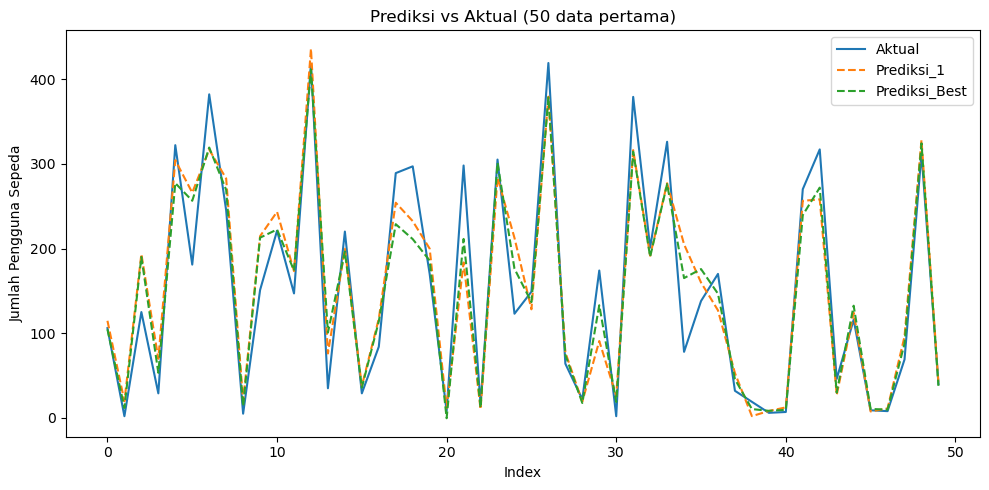

In [17]:
# Visualisasi Prediksi vs Aktual
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:50], label='Aktual')
plt.plot(y_pred[:50], label='Prediksi_1', linestyle='--')
plt.plot(y_pred_best[:50], label='Prediksi_Best', linestyle='--')
plt.title('Prediksi vs Aktual (50 data pertama)')
plt.xlabel('Index')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.legend()
plt.tight_layout()
plt.show()

### Conclusion
- Model XGBoost berhasil memprediksi jumlah penyewa sepeda dengan akurasi baik dengan melakukan Hyperparameter Tuning
- Nilai RMSE yang rendah menunjukkan error prediksi yang kecil terhadap data aktual
- MAPE menunjukan nilai 44% sehingga model ini bisa diperkirakan ada meleset sekitar 44%
- Model juga cukup fleksibel untuk menangkap pola musiman dan jam sibuk

### Recommendation
- Model ini bisa digunakan untuk penggunakan di hari-hari tertentu
- Dapat dikembangkan lebih lanjut dengan memasukkan data cuaca aktual atau data lalu lintas
- Next Improvement untuk dapat diintegrasikan dengan data real time agar model bisa semakin akurat

In [18]:
import pickle

In [22]:
with open("Eduard_CapstoneModul3_018.pkl", "wb") as file:
    pickle.dump(grid_search, file)